In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

In [7]:
def boundingRect(contour):
    points = contour.reshape(-1, 2)
    x_points = points[:, 0]
    y_points = points[:, 1]
    min_section = (min(x_points), min(y_points))
    max_section = (max(x_points), max(y_points))
    x, y = min_section
    w = max_section[0] - min_section[0]
    h = max_section[1] - min_section[1]
    return x, y, w, h

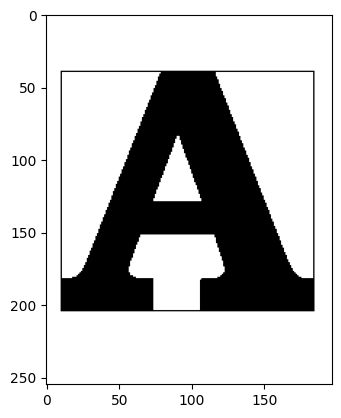

In [9]:
image = cv.imread('img.png', cv.IMREAD_GRAYSCALE)

_, image = cv.threshold(image, 127, 255, cv.THRESH_BINARY)
image = 255 - image
contours, _ = cv.findContours(image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)


for contour in contours:
    x, y, w, h = boundingRect(contour)
    cv.rectangle(image, (x, y), (x + w, y + h), 255, 1)

plt.imshow(image, 'Greys')
plt.show()